In [1]:
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
from typing import List, Dict, Tuple, Union

plt.style.use('science')

In [52]:
def get_subplot(data: List, labels: List, ax, title, x_lim=(0,21000000), y_lim=(-3, 10.5), legend=False, xy_label=False, linestyle='solid', colors=None):
    if isinstance(linestyle, str):
        linestyle = [linestyle] * len(data)
    
    for i, d in enumerate(data):
        if colors:
            ax.plot(d['Step'].values, d['Value'].values, label=labels[i], linewidth=1.5, linestyle=linestyle[i], color=colors[i])
        else:
            ax.plot(d['Step'].values, d['Value'].values, label=labels[i], linewidth=1.5, linestyle=linestyle[i])
    ax.set_title(title, fontsize=15)
    if xy_label:
        ax.set_xlabel("Steps", fontsize=12)
        ax.set_ylabel("Mean Reward", fontsize=12)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    if legend:
        ax.legend(fontsize=12)
    return ax

### gSDE

In [53]:
data1 = "../../experiments/gSDE/PPO_0_NO_SELFPLAY_1.csv"
data2 = "../../experiments/gSDE/gsde_ppo_r0_1.csv"
data1 = pd.read_csv(data1)
data2 = pd.read_csv(data2)

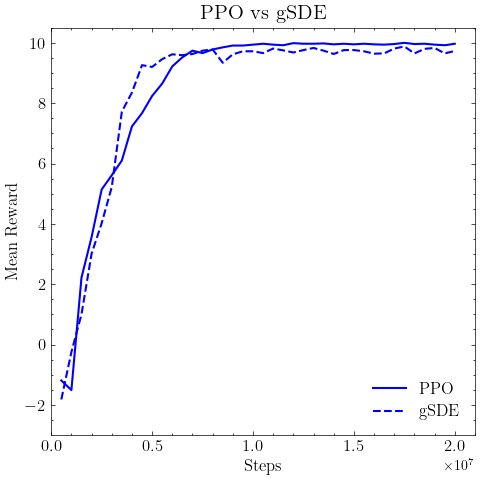

In [56]:
with plt.style.context('science'):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    ax = get_subplot([data1, data2], ["PPO", "gSDE"], ax, "PPO vs gSDE", legend=True, xy_label=True, linestyle=['solid', 'dashed'], colors=['blue', 'blue'])
    # increase tick size
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.tight_layout()
    # save as png
    plt.savefig("ppo_vs_gsde.png", dpi=300)
    plt.show()

### Rewards

In [3]:
ppo1 = pd.read_csv("../../experiments/rewards/PPO_0_NO_SELFPLAY_1.csv")
ppo2 = pd.read_csv("../../experiments/rewards/PPO_1_NO_SELFPLAY_1.csv")
ppo3 = pd.read_csv("../../experiments/rewards/PPO_2_NO_SELFPLAY_1.csv")
ppo_s1 = pd.read_csv("../../experiments/rewards/PPO_0_SELFPLAY_1.csv")
ppo_s2 = pd.read_csv("../../experiments/rewards/PPO_1_SELFPLAY_1.csv")
ppo_s3 = pd.read_csv("../../experiments/rewards/PPO_2_SELFPLAY_1.csv")
td3 = pd.read_csv("../../experiments/rewards/run-td3_0_no_self_1-tag-eval_mean_reward.csv")
td3_1 = pd.read_csv("../../experiments/rewards/run-td3_1_no_self_1-tag-eval_mean_reward.csv")
td3_2 = pd.read_csv("../../experiments/rewards/run-td3_2_no_self_1-tag-eval_mean_reward.csv")
td3_s = pd.read_csv("../../experiments/rewards/run-td3_0_with_self_1-tag-eval_mean_reward.csv")
td3_s1 = pd.read_csv("../../experiments/rewards/run-td3_1_with_self_1-tag-eval_mean_reward.csv")
td3_s2 = pd.read_csv("../../experiments/rewards/run-td3_2_with_self_1-tag-eval_mean_reward.csv")

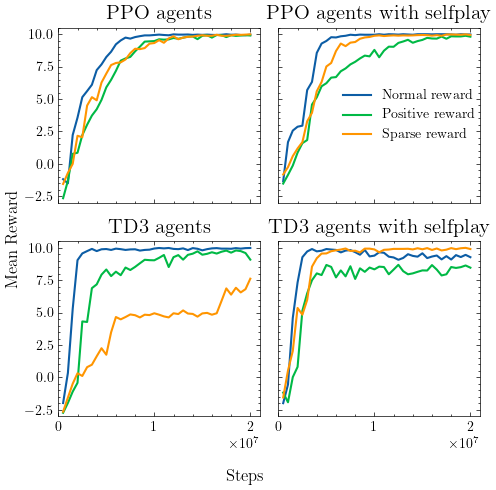

In [40]:
with plt.style.context('science'):
    fig, ax = plt.subplots(2, 2, figsize=(5, 5), sharex=True, sharey=True)
    ax[0][0] = get_subplot([ppo1, ppo2, ppo3], ["Normal reward", "Positive reward", "Sparse reward"], ax[0][0], "PPO agents")
    ax[0][1] = get_subplot([ppo_s1, ppo_s2, ppo_s3], ["Normal reward", "Positive reward", "Sparse reward"], ax[0][1], "PPO agents with selfplay")
    ax[1][0] = get_subplot([td3, td3_1, td3_2], ["Normal reward", "Positive reward", "Sparse reward"], ax[1][0], "TD3 agents")
    ax[1][1] = get_subplot([td3_s, td3_s1, td3_s2], ["Normal reward", "Positive reward", "Sparse reward"], ax[1][1], "TD3 agents with selfplay")
    
    plt.tight_layout(rect=(0.03,0.05,1,1)) # 
    handles, labels = ax[1][1].get_legend_handles_labels()
    fig.legend(handles, labels, loc=(0.68,.7), labelspacing=0.5)
    fig.supxlabel('Steps')
    fig.supylabel('Mean Reward')
    plt.savefig("./rewards.png", dpi=300)
    plt.show()